# **Primer Examen Parcial: Función Hash**

## **Hash**

In [30]:
import random

def myHash2(value, n):
  value = abs(value)
  str1 = str(value)

  exp1 = 1 / (int(str1[-1]) + 1)
  exp2 = int(str1[0]) + 5
  value = (value ** (exp1)) * (10 ** exp2)

  value = int(value)
  str2 = str(value)
  poss = [-1, 2, 3, 4]
  value = str2[poss[0]] + str2[poss[1]] + str2[poss[2]] + str2[poss[3]]

  value = int(float(value)) % n
  return value

def myHash(value, n):
  value = (value ^ (value >> 13)) * 1000000007
  value = (value ^ (value >> 14)) * 2147483647
  value = (value ^ (value >> 15)) * 5555555557
  value = value ^ (value >> 16)
  return abs(value) % n

## **Prueba**

In [31]:
MAX = 1000

arr = []
hashArr = []
contArr = [0] * MAX
colissionsArr = [0] * MAX

arr = random.sample(range(-2**(31), 2**(31)), MAX) # arreglo (aleatorio) de prueba

for i in range(0, MAX):
    hashArr.append(myHash(arr[i], MAX))
    # print(arr[i], hashArr[i])

## **Contabilización de Colisiones**

In [32]:
for i in range(0, MAX):
    for j in range(0, MAX):
        if i == hashArr[j]:
            contArr[i] += 1

for i in range(0, MAX):
    if contArr[i] <= 1:
        colissionsArr[i] = 0
    else:
        colissionsArr[i] = contArr[i] - 1

colissions = sum(colissionsArr)

print("Colisiones:", colissions)
print("Porcentaje de Colisiones:", (colissions / MAX) * 100 , "%")

Colisiones: 375
Porcentaje de Colisiones: 37.5 %


--- HASH  ---
Average collisions: 1.000
Standard deviation: 1.006
Uniformity: 1.006


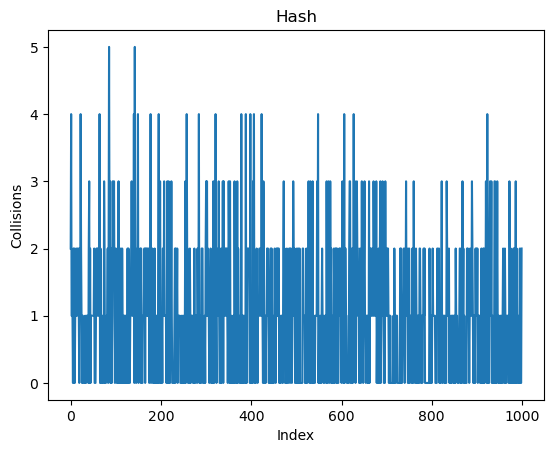

In [33]:
from matplotlib import pyplot as plt
import math

INSERT = 1000
ARR_SIZE = 1000

x = [i for i in range(0, ARR_SIZE)]
y = []

hmap: dict[int, list[int]] = {}

for v in range(1, INSERT + 1):
    h = myHash(v, ARR_SIZE)

    if h not in hmap:
        hmap[h] = [v]
    else:
        hmap[h].append(v)

t_collisions = 0
for i in range(0, ARR_SIZE):
    n_collisions = len(hmap[i]) if i in hmap else 0
    y.append(n_collisions)
    t_collisions += n_collisions

mean = t_collisions / ARR_SIZE
variance = sum((val - mean) ** 2 for val in y) / ARR_SIZE
stddev = math.sqrt(variance)

print("--- HASH  ---")
print(f"Average collisions: {mean:.3f}")
print(f"Standard deviation: {stddev:.3f}")
print(f"Uniformity: {stddev / mean:.3f}")

plt.plot(x, y)
plt.title("Hash")
plt.xlabel("Index")
plt.ylabel("Collisions")
plt.show()

In [41]:
def contar_colisiones(datos):
    """
    Cuenta las colisiones de una función hash para un conjunto de datos.
    
    Args:
        datos: Lista de elementos a hashear
        funcion_hash: Función hash a evaluar
    
    Returns:
        dict: Diccionario con estadísticas de colisiones
    """
    hash_counts = {}
    colisiones_totales = 0
    
    for dato in datos:
        hash_valor = myHash(dato, len(datos))
        
        if hash_valor in hash_counts:
            hash_counts[hash_valor] += 1
            colisiones_totales += 1
        else:
            hash_counts[hash_valor] = 1
    
    # Calcular estadísticas
    colisiones_unicas = sum(1 for count in hash_counts.values() if count > 1)
    elementos_con_colision = sum(count for count in hash_counts.values() if count > 1)
    
    return {
        'total_elementos': len(datos),
        'total_hashes_unicos': len(hash_counts),
        'colisiones_totales': colisiones_totales,
        'colisiones_unicas': colisiones_unicas,
        'elementos_con_colision': elementos_con_colision,
        'tasa_colision': colisiones_totales / len(datos) if datos else 0
    }

In [71]:
arr = random.sample(range(-2**(31), 2**(31)), MAX) # arreglo (aleatorio) de prueba
print(contar_colisiones(arr))

{'total_elementos': 1000, 'total_hashes_unicos': 610, 'colisiones_totales': 390, 'colisiones_unicas': 269, 'elementos_con_colision': 659, 'tasa_colision': 0.39}
